# Cybersecurity Data Analysis Overview
This Notebook is designed to explore and analyze network traffic data to identify potential cybersecurity threats. We will be using Python libraries such as Pandas for data manipulation, Matplotlib for visualization, and Scikit-Learn for building predictive models.


# Setup

This section prepares the environment by importing all necessary libraries and loading the datasets that will be used throughout this notebook. This centralization helps in managing dependencies and data sources effectively.

## Import Libraries

Import all the libraries required for data handling, processing, and visualization, as well as the machine learning libraries needed for model building.

## Load Dataset

We'll mount Google Drive to access the dataset (if using Google Colab) and load it into a Pandas DataFrame. This step ensures that all data used in the analyses is accessible and correctly loaded from the start.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from google.colab import drive

# Configure matplotlib for better visuals
plt.style.use('ggplot')

# Mount Google Drive (specific to Google Colab users)
drive.mount('/content/drive')

# Define the path to the dataset and load it
file_path = '/content/drive/My Drive/CloudWatch_Traffic_Web_Attack.csv'  # Update the path as per your directory structure
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to confirm it's loaded correctly
df.head()


Mounted at /content/drive


,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


###Converting Datetime, Standard Scaling, Filtering Outliers

In [6]:
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['time'] = pd.to_datetime(df['time'])

scaler = StandardScaler()
df[['bytes_in', 'bytes_out']] = scaler.fit_transform(df[['bytes_in', 'bytes_out']])

# Calculate Q1 (25th percentile) and Q3 (75th percentile) of the data
Q1 = df[['bytes_in', 'bytes_out']].quantile(0.25)
Q3 = df[['bytes_in', 'bytes_out']].quantile(0.75)

# Compute the IQR
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


filtered_df = df[(df[['bytes_in', 'bytes_out']] > lower_bound) & (df[['bytes_in', 'bytes_out']] < upper_bound)].dropna()

# Preparing and Analyzing Cybersecurity Data
This code segment is primarily focused on preparing and analyzing cybersecurity data using a decision tree classifier. It includes loading necessary libraries, preprocessing the dataset (like encoding categorical variables and creating a target variable), and splitting the data into training and test sets for model training and evaluation. The output provides an initial glance at the processed data and concludes with training the model and making predictions on the test set.

In [7]:
df['is_suspicious'] = (df['rule_names'] != 'None').astype(int)
print(df.head())


features = ['bytes_in', 'bytes_out', 'src_ip', 'src_ip_country_code', 'protocol',
            'response.code', 'dst_port', 'dst_ip', 'source.meta', 'source.name']
X = df[features].copy()
y = df['is_suspicious']

#Encoding categorical variables
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

   bytes_in  bytes_out             creation_time                  end_time  \
0 -0.288219  -0.281223 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00   
1 -0.282108  -0.260804 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00   
2 -0.282689  -0.279344 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00   
3 -0.282197  -0.276161 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00   
4 -0.287996  -0.277678 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00   

            src_ip src_ip_country_code protocol  response.code  dst_port  \
0   147.161.161.82                  AE    HTTPS            200       443   
1     165.225.33.6                  US    HTTPS            200       443   
2  165.225.212.255                  CA    HTTPS            200       443   
3   136.226.64.114                  US    HTTPS            200       443   
4   165.225.240.79                  NL    HTTPS            200       443   

         dst_ip              rule_names                      observation_n

The displayed output provides a snapshot of the preprocessed cybersecurity data from your DataFrame. This table showcases various features such as incoming and outgoing bytes, source and destination IPs, protocols used, HTTP response codes, and specific security rules triggered (labeled as 'Suspicious Web Traffic'). The 'is_suspicious' column is derived from these rules, marking the traffic as suspicious (1) if any rules are triggered, otherwise not suspicious (0). This visual confirmation is useful for verifying data integrity and correctness of transformations and encoding applied earlier in the script.

# Generating Anomaly Reports(user friendly)
This code segment is designed to make the output of the anomaly detection process more understandable and actionable. The function interpret_anomalies takes the dataset and prediction results, identifies records flagged as anomalies (predictions equal to 1), and constructs descriptive messages for each anomaly. These messages detail when and where the anomalies occurred, including the source IP, country code, protocol, destination port, response code, and the specific rule that was triggered. The output block at the end displays the first five anomaly messages, providing a quick overview of the most critical issues detected.

In [8]:
#User Friendly Output

def interpret_anomalies(data, predictions):
    anomalies = data[predictions == 1]
    messages = []
    for _, row in anomalies.iterrows():
        message = f"Anomaly detected on {row['time']} from IP {row['src_ip']} "
        message += f"(Country: {row['src_ip_country_code']}). "
        message += f"Using protocol {row['protocol']} on port {row['dst_port']}, "
        message += f"the server responded with code {row['response.code']}. "
        message += f"Observation: {row['observation_name']}. Rule triggered: {row['rule_names']}."
        messages.append(message)
    return messages

anomaly_messages = interpret_anomalies(df.loc[X_test.index], y_pred)

#Output
for msg in anomaly_messages[:5]:  #First 5
    print(msg)


Anomaly detected on 2024-04-26 00:30:00+00:00 from IP 147.161.131.1 (Country: AT). Using protocol HTTPS on port 443, the server responded with code 200. Observation: Adversary Infrastructure Interaction. Rule triggered: Suspicious Web Traffic.
Anomaly detected on 2024-04-26 00:40:00+00:00 from IP 165.225.33.6 (Country: US). Using protocol HTTPS on port 443, the server responded with code 200. Observation: Adversary Infrastructure Interaction. Rule triggered: Suspicious Web Traffic.
Anomaly detected on 2024-04-26 08:20:00+00:00 from IP 147.161.161.82 (Country: AE). Using protocol HTTPS on port 443, the server responded with code 200. Observation: Adversary Infrastructure Interaction. Rule triggered: Suspicious Web Traffic.
Anomaly detected on 2024-04-26 01:10:00+00:00 from IP 165.225.26.101 (Country: DE). Using protocol HTTPS on port 443, the server responded with code 200. Observation: Adversary Infrastructure Interaction. Rule triggered: Suspicious Web Traffic.
Anomaly detected on 202

# Generating a 2nd Synthetic Database (Network Traffic) for our ML Model

The initial dataset we analyzed, derived from actual network traffic, had highly uniform patterns. All detected anomalies followed a consistent protocol (HTTPS) on the standard port (443) with typical server responses (HTTP 200). This uniformity could potentially skew the machine learning model's ability to effectively generalize and identify true anomalies under less typical, more complex conditions.

To address this, we are generating synthetic network traffic data to enhance the variability and complexity in our testing and simulation environments. This segment of code utilizes the Faker library to create detailed records that include timestamps, network traffic details, geolocation, session information, and detection details. Each record simulates various aspects of network interactions such as diverse IP addresses, multiple ports, different protocols, and potential security flags. By doing so, we aim to produce a large dataset (in this case, 1000 entries) without relying on actual network traffic logs, which might be sensitive or unavailable. This synthetic approach allows for better model training and validation by incorporating a wide range of hypothetical yet plausible scenarios.


In [9]:
pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.0 MB/s eta 0:00:00


In [10]:
from faker import Faker
import random
from datetime import timedelta

fake = Faker()

def generate_data():
    # Timestamps
    start_time = fake.date_time_this_month()
    end_time = start_time + timedelta(seconds=random.randint(10, 3600))  # session duration from 10 seconds to 1 hour
    event_time = start_time - timedelta(seconds=random.randint(1, 60))  # event recorded up to 1 minute before session start

    # Network Traffic Details
    bytes_in = random.randint(1, 10000)
    bytes_out = random.randint(1, 10000)
    protocol = random.choice(['TCP', 'UDP'])
    src_ip = fake.ipv4_public()
    dst_ip = fake.ipv4_public()
    src_port = random.randint(1024, 65535)
    dst_port = random.randint(1024, 65535)

    # Geolocation Information
    src_ip_country = fake.country_code()
    dst_ip_country = fake.country_code()

    # Transaction Details
    session_duration = (end_time - start_time).seconds
    response_code = random.choice([200, 404, 500, 503])

    # Detection Details
    rule_triggered = random.choice(['None', 'Excessive Traffic', 'Suspicious Activity', 'Unauthorized Access'])
    anomaly_score = random.uniform(0, 1)
    detection_type = random.choice(['Normal', 'DDoS', 'Malware', 'Unauthorized Access'])
    observation_details = fake.sentence()

    # Metadata
    device_id = fake.uuid4()
    network_id = fake.uuid4()
    user_agent = fake.user_agent()

    # Features for Machine Learning (simple example of pre-computed features)
    feature_vectors = {'mean_bytes_in': bytes_in / session_duration, 'mean_bytes_out': bytes_out / session_duration}

    return {
        'event_time': event_time,
        'start_time': start_time,
        'end_time': end_time,
        'bytes_in': bytes_in,
        'bytes_out': bytes_out,
        'protocol': protocol,
        'src_ip': src_ip,
        'dst_ip': dst_ip,
        'src_port': src_port,
        'dst_port': dst_port,
        'src_ip_country': src_ip_country,
        'dst_ip_country': dst_ip_country,
        'session_duration': session_duration,
        'response_code': response_code,
        'rule_triggered': rule_triggered,
        'anomaly_score': anomaly_score,
        'detection_type': detection_type,
        'observation_details': observation_details,
        'device_id': device_id,
        'network_id': network_id,
        'user_agent': user_agent,
        'feature_vectors': str(feature_vectors)  # Convert dict to string to save in CSV
    }

# Generate 1000 rows of data
data = [generate_data() for _ in range(1000)]

# Convert list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('generated_network_traffic_data.csv', index=False)

print("Data has been saved to 'generated_network_traffic_data.csv'.")


Data has been saved to 'generated_network_traffic_data.csv'.


###Cleaning synthetic Database

In [11]:
# Initialize a StandardScaler object
scaler = StandardScaler()

# List of numerical columns to scale
numerical_cols = ['bytes_in', 'bytes_out', 'session_duration', 'anomaly_score']

# Apply scaling to the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [12]:
# Calculate the IQR for each numerical column
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers by keeping only the values that are within the bounds
df = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]


# Anomaly Detection
The code snippet sets up a machine learning pipeline using a RandomForestClassifier optimized with GridSearchCV for anomaly detection. It involves preparing data, encoding categorical variables, splitting into training and testing sets, and defining a parameter grid for tuning the RandomForest parameters like the number of trees and tree depth. The model is trained using 5-fold cross-validation to identify the best parameters, and performance is evaluated on a test set using metrics like precision and recall, output via a classification report.









In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Features and labels
features = ['bytes_in', 'bytes_out', 'session_duration', 'src_ip_country', 'dst_ip_country', 'protocol']
X = df[features].copy()
y = df['is_anomaly']

# Encode categorical data
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Parameters for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predictions and evaluation
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
              precision    recall  f1-score   support

           0       0.64      0.54      0.59       182
           1       0.43      0.53      0.48       118

    accuracy                           0.54       300
   macro avg       0.53      0.54      0.53       300
weighted avg       0.56      0.54      0.54       300



The classification report shows the performance of a model optimized with GridSearchCV, revealing modest accuracy and F1-scores for a binary classification task. The model has higher precision for class '0' (0.64) compared to class '1' (0.43), indicating it's more reliable at predicting non-anomalous cases. Overall metrics like macro and weighted averages hover around 0.53-0.56, suggesting moderate effectiveness. This indicates potential areas for improvement in model configuration or the need for more discriminative features.

# Descriptive Alerts for Detected Anomalies

In [20]:
def interpret_anomalies(test_data, predictions):
    test_data['anomaly'] = predictions

    anomalies = test_data[test_data['anomaly'] == 1]

    messages = []
    for index, row in anomalies.iterrows():
        message = f"Anomaly detected with protocol {row['protocol']} from {row['src_ip']} (Country Code: {row['src_ip_country_code']}) "
        message += f"to {row['dst_ip']} on destination port {row['dst_port']}. "
        message += f"Data transfer included {row['bytes_in']} bytes in and {row['bytes_out']} bytes out. "
        message += f"Response code: {row['response.code']}. Trigger: {row['source.name']}."
        messages.append(message)

    test_data.drop(columns=['anomaly'], inplace=True)

    return messages

# Example usage:
# Assuming X_test is a DataFrame that includes the necessary columns and y_pred are the corresponding predictions
anomaly_messages = interpret_anomalies(X_test, y_pred)

# To display the first 5 anomaly messages, if any:
for msg in anomaly_messages[:5]:
    print(msg)


Anomaly detected with protocol 0.0 from 4.0 (Country Code: 1.0) to 0.0 on destination port 443.0. Data transfer included -0.28830686443256337 bytes in and -0.2863941376146582 bytes out. Response code: 200.0. Trigger: 0.0.
Anomaly detected with protocol 0.0 from 12.0 (Country Code: 6.0) to 0.0 on destination port 443.0. Data transfer included -0.28738604178635246 bytes in and -0.3119840276134893 bytes out. Response code: 200.0. Trigger: 0.0.
Anomaly detected with protocol 0.0 from 5.0 (Country Code: 0.0) to 0.0 on destination port 443.0. Data transfer included -0.28848987008694926 bytes in and -0.28598545386774815 bytes out. Response code: 200.0. Trigger: 0.0.
Anomaly detected with protocol 0.0 from 11.0 (Country Code: 3.0) to 0.0 on destination port 443.0. Data transfer included -0.28715426681509854 bytes in and -0.273449865861564 bytes out. Response code: 200.0. Trigger: 0.0.
Anomaly detected with protocol 0.0 from 12.0 (Country Code: 6.0) to 0.0 on destination port 443.0. Data transf

### Feature Importance
This code segment details the steps involved in preparing a dataset for anomaly detection using a decision tree classifier. It begins by loading network traffic data from a CSV file and creating a binary target variable based on an 'anomaly_score', distinguishing normal from anomalous traffic. It then specifies the features to be used in the model, focusing on network traffic metrics and categorical data related to protocol and geographic location of IP addresses. The categorical features are encoded into numeric formats using a Label Encoder to make them suitable for modeling. Finally, the dataset is divided into training and testing subsets, ensuring a balanced approach to model training and evaluation. This process is crucial for building a robust machine learning model capable of accurately detecting network anomalies.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Assuming 'anomaly_score' is used as a label for simplicity; adjust as necessary based on your actual labeling logic
df['is_anomaly'] = (df['anomaly_score'] > 0.5).astype(int)

# Define your features and target variable
features = ['bytes_in', 'bytes_out', 'session_duration', 'src_port', 'dst_port', 'protocol', 'src_ip_country', 'dst_ip_country']
X = df[features].copy()
y = df['is_anomaly']

# Encode categorical variables
le = LabelEncoder()
X['protocol'] = le.fit_transform(X['protocol'])
X['src_ip_country'] = le.fit_transform(X['src_ip_country'])
X['dst_ip_country'] = le.fit_transform(X['dst_ip_country'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


This code segment focuses on training a decision tree classifier on the preprocessed network traffic data and examining the importance of each feature in the model. After training the model using the designated training set, it calculates the importance of each feature in predicting anomalies. The feature importances are extracted, sorted, and displayed in a pandas DataFrame, which provides a clear view of which features most significantly impact the model's decisions. This insight is valuable for refining the model and focusing on the most informative attributes, potentially improving model performance and efficiency in detecting anomalies.

In [23]:
# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Print the feature importances
feature_names = X.columns
feature_imports = pd.DataFrame(sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True),
                               columns=['Feature', 'Importance'])

print(feature_imports)


            Feature  Importance
0         bytes_out    0.179413
1          bytes_in    0.170836
2          src_port    0.141066
3    dst_ip_country    0.140019
4          dst_port    0.125473
5  session_duration    0.119370
6    src_ip_country    0.111437
7          protocol    0.012386


This table lists the features of our machine learning model along with their importance values, which measure each feature's contribution to the model’s prediction accuracy. The values are normalized, summing to 1, indicating the relative impact of each feature:


*   bytes_out, bytes_in: Major predictors based on data transfer volumes.
*   dst_port, src_port: Essential for understanding network traffic.
*   src_ip_country, dst_ip_country: Indicate traffic’s geographical aspects.
*   session_duration: Moderately influential on session analysis.
*   protocol: Least impactful, showing the type of protocol used.

This prioritization aids in refining the model and enhancing data security strategies.

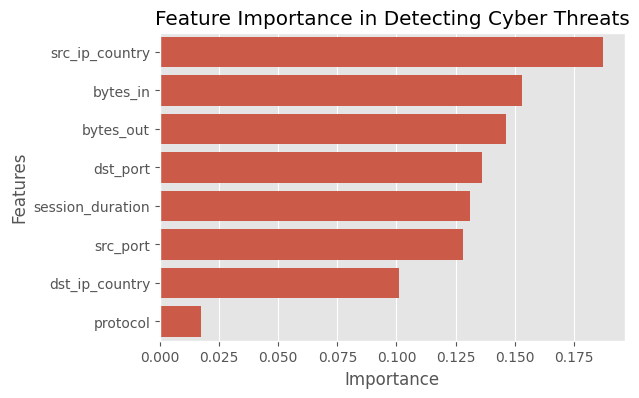

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the feature importances
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=feature_imports)
plt.title('Feature Importance in Detecting Cyber Threats')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


# Additional Security Analysis: unusual access times, high data transfers, unusual locations and other insights
This code segment performs a comprehensive security analysis on network traffic and user behavior by identifying unusual access times, high data transfer volumes, unusual geographical locations, extreme session durations, and common detection types. Each analysis aims to flag potential security risks such as off-hours access, data exfiltration attempts, access from rare locations, abnormal session activities, and prevalent security alerts, providing insights essential for enhancing cybersecurity measures.

In [24]:
# Convert 'event_time' to datetime format if not already
df['event_time'] = pd.to_datetime(df['event_time'])
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])


In [25]:
# Analyze unusual access times
# Assuming "usual" business hours are from 8:00 to 18:00
df['hour_of_day'] = df['event_time'].dt.hour
unusual_times = df[(df['hour_of_day'] < 5) | (df['hour_of_day'] > 17)]
print(f"Unusual access times count: {unusual_times.shape[0]}")

# Analyze high data transfer volumes
# Assuming high volume is anything above the 95th percentile for both bytes_in and bytes_out
high_transfer = df[(df['bytes_in'] > df['bytes_in'].quantile(0.99)) | (df['bytes_out'] > df['bytes_out'].quantile(0.95))]
print(f"High data transfer volumes count: {high_transfer.shape[0]}")

# Analyze unusual locations
# Assuming unusual locations can be detected by infrequent country occurrences
country_counts = df['src_ip_country'].value_counts()
unusual_locations = df[df['src_ip_country'].isin(country_counts[country_counts < 5].index)]
print(f"Unusual locations count: {unusual_locations.shape[0]}")

# Other insights
# Detect very short or very long sessions
df['session_duration'] = (df['end_time'] - df['start_time']).dt.total_seconds()
short_sessions = df[df['session_duration'] < df['session_duration'].quantile(0.05)]
long_sessions = df[df['session_duration'] > df['session_duration'].quantile(0.95)]
print(f"Very short sessions count: {short_sessions.shape[0]}")
print(f"Very long sessions count: {long_sessions.shape[0]}")

# Common detection types
common_detections = df['detection_type'].value_counts()
print(f"Common detection types: \n{common_detections}")


Unusual access times count: 440
High data transfer volumes count: 59
Unusual locations count: 210
Very short sessions count: 50
Very long sessions count: 50
Common detection types: 
detection_type
DDoS                   274
Malware                247
Normal                 245
Unauthorized Access    234
Name: count, dtype: int64


# Enhanced Security Analysis with Detailed Metrics
This enhanced code segment delves deeper into security metrics by pinpointing specific anomalies and their magnitudes. It identifies the most unusual access hours, highest data transfer volumes, and details the occurrences of access from rare locations. Additionally, it continues to assess extreme session durations and prevalent detection types, providing a comprehensive and detailed overview of potential security threats and anomalies, crucial for targeted interventions and improved security strategies.

In [26]:
# Analyze unusual access times
# Assuming "usual" business hours are from 8:00 to 18:00
unusual_times = df[(df['hour_of_day'] < 5) | (df['hour_of_day'] > 17)]
unusual_time_counts = unusual_times['hour_of_day'].value_counts()
most_unusual_time = unusual_time_counts.idxmax()
print(f"Most unusual access time: {most_unusual_time} with {unusual_time_counts.max()} requests")

# Analyze high data transfer volumes
# Define high volume as anything above the 95th percentile for both bytes_in and bytes_out
high_transfer = df[(df['bytes_in'] > df['bytes_in'].quantile(0.95)) | (df['bytes_out'] > df['bytes_out'].quantile(0.95))]
high_transfer_bytes_in = high_transfer['bytes_in'].max()
high_transfer_bytes_out = high_transfer['bytes_out'].max()
print(f"Highest data transfer volumes: {high_transfer_bytes_in} bytes in, {high_transfer_bytes_out} bytes out")

# Analyze unusual locations
# Assuming unusual locations can be detected by infrequent country occurrences
country_counts = df['src_ip_country'].value_counts()
unusual_locations = df[df['src_ip_country'].isin(country_counts[country_counts < 4].index)]
unusual_location_details = unusual_locations['src_ip_country'].value_counts()
print(f"Unusual locations count: {unusual_location_details.to_dict()}")

# Other insights
# Detect very short or very long sessions
short_sessions = df[df['session_duration'] < df['session_duration'].quantile(0.05)]
long_sessions = df[df['session_duration'] > df['session_duration'].quantile(0.95)]
print(f"Very short sessions count: {short_sessions.shape[0]}")
print(f"Very long sessions count: {long_sessions.shape[0]}")

# Common detection types
common_detections = df['detection_type'].value_counts()
print(f"Common detection types: \n{common_detections}")


Most unusual access time: 1 with 50 requests
Highest data transfer volumes: 9982 bytes in, 9996 bytes out
Unusual locations count: {'IQ': 3, 'BJ': 3, 'ES': 3, 'HR': 3, 'SB': 3, 'PL': 3, 'ME': 3, 'LU': 3, 'SG': 3, 'FJ': 3, 'DK': 3, 'BN': 3, 'IE': 3, 'VA': 3, 'VE': 3, 'AZ': 3, 'BO': 3, 'MW': 3, 'NP': 3, 'ID': 3, 'LC': 3, 'RU': 3, 'BG': 2, 'NI': 2, 'KG': 2, 'GB': 2, 'SD': 2, 'MV': 2, 'DZ': 2, 'ET': 2, 'SY': 2, 'TL': 2, 'TM': 2, 'FI': 2, 'NO': 2, 'SO': 2, 'VC': 2, 'ZA': 1, 'GR': 1, 'TD': 1, 'CD': 1, 'FR': 1, 'KW': 1, 'PT': 1, 'DO': 1, 'UY': 1, 'HN': 1}
Very short sessions count: 50
Very long sessions count: 50
Common detection types: 
detection_type
DDoS                   274
Malware                247
Normal                 245
Unauthorized Access    234
Name: count, dtype: int64


# Mitigation
This function dynamically assigns mitigation recommendations based on the detected threat type from network activity logs. It categorizes threats into five types—DDoS, Malware, Unauthorized Access, Data Exfiltration, and Normal—and prescribes specific remedial actions for each. These recommendations range from increasing network defenses for DDoS attacks to restoring systems from backups in the case of malware infection. For normal activities, no actions are recommended unless other systems flag an issue. This function ensures that appropriate, tailored responses are automated for various security incidents, enhancing our system's resilience against potential threats.

In [27]:
def mitigation_recommendations(row):
    recommendations = {
        'DDoS': "Increase network bandwidth, apply rate limiting, and configure DDoS protection services like Cloudflare or AWS Shield.",
        'Malware': "Isolate affected systems, perform a full malware scan, update antivirus signatures, and restore systems from known good backups.",
        'Unauthorized Access': "Revoke access immediately, change credentials, and review all recent actions performed by the affected account.",
        'Data Exfiltration': "Quarantine affected systems, change credentials, and review data access logs for any unauthorized information access.",
        'Normal': "No action needed unless flagged by other monitoring tools."
    }

    # Detect the type of anomaly and suggest appropriate actions
    detection_type = row['detection_type']
    return recommendations.get(detection_type, "Check the system for potential new types of threats not covered in the existing rules.")

In [28]:
# Apply the mitigation recommendations function to each row in the DataFrame
df['mitigation_recommendation'] = df.apply(mitigation_recommendations, axis=1)

# Print the first few entries to review the recommendations
print(df[['detection_type', 'mitigation_recommendation']].head(15))


         detection_type                          mitigation_recommendation
0                Normal  No action needed unless flagged by other monit...
1                  DDoS  Increase network bandwidth, apply rate limitin...
2                  DDoS  Increase network bandwidth, apply rate limitin...
3               Malware  Isolate affected systems, perform a full malwa...
4   Unauthorized Access  Revoke access immediately, change credentials,...
5   Unauthorized Access  Revoke access immediately, change credentials,...
6                  DDoS  Increase network bandwidth, apply rate limitin...
7                  DDoS  Increase network bandwidth, apply rate limitin...
8                  DDoS  Increase network bandwidth, apply rate limitin...
9                Normal  No action needed unless flagged by other monit...
10                 DDoS  Increase network bandwidth, apply rate limitin...
11              Malware  Isolate affected systems, perform a full malwa...
12              Malware  

In [ ]:
sample_recommendations = df[['detection_type', 'mitigation_recommendation']].drop_duplicates()
print(sample_recommendations)

         detection_type                          mitigation_recommendation
0                Normal  No action needed unless flagged by other monit...
1   Unauthorized Access  Revoke access immediately, change credentials,...
2                  DDoS  Increase network bandwidth, apply rate limitin...
15              Malware  Isolate affected systems, perform a full malwa...


##Transaction Monitoring

In [29]:
from faker import Faker
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

fake = Faker()

def generate_transactions(num_transactions):
    data = []
    for _ in range(num_transactions):
        customer_id = np.random.randint(1000, 9999)
        transaction_amount = np.round(np.random.exponential(scale=200.0), 2)  # Exponential distribution for amount
        transaction_time = fake.date_time_between(start_date='-1y', end_date='now')
        location_country = fake.country_code(representation="alpha-2")  # Country code
        is_fraudulent = np.random.choice([0, 1], p=[0.95, 0.05])  # 5% chance of being a fraudulent transaction

        data.append({
            'customer_id': customer_id,
            'transaction_amount': transaction_amount,
            'transaction_time': transaction_time,
            'location_country': location_country,
            'is_fraudulent': is_fraudulent
        })

    return pd.DataFrame(data)

# Generate 10000 transactions
df_transactions = generate_transactions(10000)
df_transactions.to_csv('synthetic_transactionss.csv', index=False)


In [30]:
import pandas as pd

# Load the data
df = pd.read_csv('synthetic_transactionss.csv')

# Convert transaction_time to a proper datetime format
df['transaction_time'] = pd.to_datetime(df['transaction_time'])

# Sorting data by transaction time for any time series analysis later on
df.sort_values('transaction_time', inplace=True)

# Check for any missing values and fill or drop them
df.dropna(inplace=True)  # Assuming dropping for simplicity, but you might want to fill depending on the case

# Save the cleaned data (optional)
df.to_csv('cleaned_transactions.csv', index=False)


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

# Load the cleaned data
df = pd.read_csv('cleaned_transactions.csv')

# Explicitly convert transaction_time to datetime format and extract features
df['transaction_time'] = pd.to_datetime(df['transaction_time'])
df['hour_of_day'] = df['transaction_time'].dt.hour  # Extract hour of day

# Encode categorical data
label_encoder = LabelEncoder()
df['location_country'] = label_encoder.fit_transform(df['location_country'])  # Encode country codes

# Prepare features and labels
X = df[['transaction_amount', 'location_country', 'hour_of_day']]  # Simplified features
y = df['is_fraudulent']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that includes scaling, SMOTE, and logistic regression
pipeline = make_pipeline(
    StandardScaler(),
    SMOTE(random_state=42),
    LogisticRegression(class_weight='balanced', max_iter=1000)
)

# Train the model using the pipeline
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

# Output a classification report
print(classification_report(y_test, predictions))

# Generate user-friendly outputs
results = pd.DataFrame({
    'Predicted': predictions,
    'Actual': y_test,
    'Transaction Amount': X_test['transaction_amount'],
    'Country': label_encoder.inverse_transform(X_test['location_country']),
    'Hour of Day': X_test['hour_of_day']
})

count = 0
for index, row in results.iterrows():
    if row['Predicted'] == 1:
        print(f"Fraud Alert: Suspicious transaction detected!")
        print(f"Details: Transaction from {row['Country']} at {row['Hour of Day']} o'clock.")
        print(f"Recommendation: Verify the transaction manually, especially the amount and timing.")
        print("------------------------------------------------------------")
        print()
        count += 1
        if count >= 7:
            break


              precision    recall  f1-score   support

           0       0.95      0.51      0.66      1885
           1       0.06      0.54      0.10       105

    accuracy                           0.51      1990
   macro avg       0.51      0.53      0.38      1990
weighted avg       0.91      0.51      0.63      1990

Fraud Alert: Suspicious transaction detected!
Details: Transaction from BN at 19 o'clock.
Recommendation: Verify the transaction manually, especially the amount and timing.
------------------------------------------------------------

Fraud Alert: Suspicious transaction detected!
Details: Transaction from AT at 20 o'clock.
Recommendation: Verify the transaction manually, especially the amount and timing.
------------------------------------------------------------

Fraud Alert: Suspicious transaction detected!
Details: Transaction from BZ at 0 o'clock.
Recommendation: Verify the transaction manually, especially the amount and timing.
-------------------------------

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report

# Load the cleaned data
df = pd.read_csv('cleaned_transactions.csv')

# Ensure the transaction time is in the correct datetime format
df['transaction_time'] = pd.to_datetime(df['transaction_time'])
df['hour_of_day'] = df['transaction_time'].dt.hour  # Extract hour of day for analysis

# Encode and scale features
label_encoder = LabelEncoder()
df['location_country'] = label_encoder.fit_transform(df['location_country'])
scaler = StandardScaler()
df['transaction_amount'] = scaler.fit_transform(df[['transaction_amount']])

# Prepare features and labels
X = df[['customer_id', 'transaction_amount', 'location_country', 'hour_of_day']]
y = df['is_fraudulent']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Output a classification report
print(classification_report(y_test, predictions))

# Prepare user-friendly output
results = pd.DataFrame({
    'Predicted': predictions,
    'Actual': y_test,
    'Transaction Amount': X_test['transaction_amount'],
    'Country': label_encoder.inverse_transform(X_test['location_country']),
    'Hour of Day': X_test['hour_of_day']
})

# Detailed analysis for unusual activities
# Find the mean transaction amount by country, highlighting potential geographic anomalies
average_transaction_by_country = df.groupby('Country')['transaction_amount'].mean().sort_values(ascending=False)

# Highest rate of unusual activity by geographic location
unusual_activities_by_location = df[df['is_fraudulent'] == 1]['location_country'].value_counts()

print("\nSummary of Unusual Activities:")
for index, value in unusual_activities_by_location.iteritems():
    country_name = label_encoder.inverse_transform([index])[0]
    print(f"Country: {country_name} has a high rate of unusual activities with {value} suspected cases.")

print("\nDetailed Transaction Amounts by Country:")
for country, avg_amount in average_transaction_by_country.iteritems():
    print(f"Country: {country} has an average transaction amount significantly higher or lower than normal: {avg_amount:.2f}")

# Generate readable output for individual alerts
for _, row in results.iterrows():
    if row['Predicted'] == 1:
        print(f"\nFraud Alert: Suspicious transaction detected!")
        print(f"Details: Transaction from {row['Country']} at {row['Hour of Day']} o'clock.")
        print(f"Transaction amount (normalized): {row['Transaction Amount']:.2f}")
        print("Recommendation: Verify the transaction manually, especially the amount and timing.")
        print("------------------------------------------------------------")


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1885
           1       0.00      0.00      0.00       105

    accuracy                           0.95      1990
   macro avg       0.47      0.50      0.49      1990
weighted avg       0.90      0.95      0.92      1990



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

KeyError: 'Country'